# Financial Consumer Complaints Data Cleaning and Exploratory Data Analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Loading the data set

In [20]:
df = pd.read_excel(r"C:\Users\Hp\Downloads\Financial Consumer Complaints.xlsx")
print(df.head())

   Complaint ID Date Sumbited                      Product  \
0       2824926    2018-02-24  Credit card or prepaid card   
1       1515991    2015-08-12              Debt collection   
2       1145261    2014-12-05      Bank account or service   
3       2573763    2017-07-13                     Mortgage   
4       2573113    2017-07-13                     Mortgage   

                                  Sub-product  \
0  General-purpose credit card or charge card   
1                                 Credit card   
2                            Checking account   
3                  Conventional home mortgage   
4                  Conventional home mortgage   

                                 Issue                              Sub-issue  \
0                 Closing your account            Company closed your account   
1  Improper contact or sharing of info  Contacted employer after asked not to   
2             Deposits and withdrawals                                     ""   
3       

2. Checking the data type

In [21]:
print(df.dtypes)

Complaint ID                             int64
Date Sumbited                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date Received                   datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
dtype: object


3. Checking for duplicates

In [22]:
df.drop_duplicates()

,Complaint ID,Date Sumbited,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Received,Company response to consumer,Timely response?,Consumer disputed?
0,2824926,2018-02-24,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,NaN,Cumulus Financial,FL,33179,NaN,Consent not provided,Web,2018-02-24,Closed with explanation,Yes,NaN
1,1515991,2015-08-12,Debt collection,Credit card,Improper contact or sharing of info,Contacted employer after asked not to,NaN,Cumulus Financial,CA,93561,NaN,Consent not provided,Web,2015-08-12,Closed with explanation,Yes,No
2,1145261,2014-12-05,Bank account or service,Checking account,Deposits and withdrawals,"""""",NaN,Cumulus Financial,CA,91792,NaN,NaN,Referral,2014-12-08,Closed with explanation,Yes,No
3,2573763,2017-07-13,Mortgage,Conventional home mortgage,Trouble during payment process,"""""",Company has responded to the consumer and the ...,Cumulus Financial,CA,92629,NaN,Consent not provided,Web,2017-07-13,Closed with explanation,Yes,NaN
4,2573113,2017-07-13,Mortgage,Conventional home mortgage,Struggling to pay mortgage,"""""",NaN,Cumulus Financial,NY,10016,NaN,Consent not provided,Web,2017-07-13,Closed with explanation,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75508,3080971,2018-11-22,Debt collection,Credit card debt,Communication tactics,Frequent or repeated calls,Company has responded to the consumer and the ...,Cumulus Financial,GA,31701,NaN,Consent provided,Web,2018-11-22,Closed with monetary relief,Yes,NaN
75509,3111624,2018-12-28,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,Cumulus Financial,CA,90046,NaN,NaN,Phone,2018-12-28,Closed with monetary relief,Yes,NaN
75510,3141604,2019-02-01,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,Company has responded to the consumer and the ...,Cumulus Financial,MD,20874,NaN,NaN,Referral,2019-02-04,Closed with explanation,Yes,NaN
75511,3081601,2018-11-23,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,Company has responded to the consumer and the ...,Cumulus Financial,GA,302XX,NaN,Consent provided,Web,2018-11-23,Closed with non-monetary relief,Yes,NaN


In [23]:
#Check for duplicate rows

duplicates = df.duplicated().sum()
print(df.duplicated().sum())

0


In [24]:
#Check for missing values

print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Complaint ID                        0
Date Sumbited                       0
Product                             0
Sub-product                         0
Issue                               0
Sub-issue                         751
Company public response         48178
Company                             0
State                            2893
ZIP code                         4367
Tags                            66560
Consumer consent provided?      52174
Submitted via                       0
Date Received                       0
Company response to consumer        0
Timely response?                    0
Consumer disputed?              36947
dtype: int64


4. Fixing the missing values and checking for unique values

In [25]:
# Filling 'Sub-issue' with 'Unknown'
df['Sub-issue'].fillna('Unknown', inplace=True)

# Filling 'Company public response' with 'No Response'
df['Company public response'].fillna('No Response', inplace=True)

# Filling 'State' with the most frequent state (mode)
df['State'].fillna('Unknown', inplace=True)

# Filling 'ZIP code' with a placeholder 
df['ZIP code'].fillna('00000', inplace=True)

# Filling 'Tags' with 'No Tags'
df['Tags'].fillna('No Tags', inplace=True)

# Filling 'Consumer consent provided?' with 'Not Provided'
df['Consumer consent provided?'].fillna('Not Provided', inplace=True)

# Filling 'Consumer disputed?' with 'Unknown'
df['Consumer disputed?'].fillna('Unknown', inplace=True)

# Check the summary after filling missing values
print("\nAfter Filling Missing Values:")
print(df.isnull().sum())


After Filling Missing Values:
Complaint ID                    0
Date Sumbited                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date Received                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64


In [27]:
#Check for unique values in gender

print("Unique Values in 'Timely response?':")
print(df['Timely response?'].unique())

Unique Values in 'Timely response?':
['Yes' 'No']


In [28]:
#Check for unique values in gender

print("Unique Values in 'Consumer disputed?':")
print(df['Consumer disputed?'].unique())

Unique Values in 'Consumer disputed?':
['Unknown' 'No' 'Yes']


5. Standardizing the date

In [29]:
# List of columns that should be standardized as dates
date_columns = ['Date Sumbited', 'Date Received']

# Convert date columns to datetime format
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

# Check the data types to ensure dates are standardized
print(df.dtypes)

# Display the first few rows after standardizing dates
print(df.head())

Complaint ID                             int64
Date Sumbited                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date Received                   datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
dtype: object
   Complaint ID Date Sumbited                      Product  \
0       2824926    2018-02-24  Credit card or prepaid card   
1       1515991    2015-08-12              Debt collection   
2

In [31]:
# Rename the column 'Date Sumbited' to 'date submitted'
df.rename(columns={'Date Sumbited': 'date submitted'}, inplace=True)
print(df.columns)

Index(['Complaint ID', 'date submitted', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Company public response', 'Company', 'State', 'ZIP code',
       'Tags', 'Consumer consent provided?', 'Submitted via', 'Date Received',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')


# Exploratory Data Analysis

1. Total complaints and Timely Response Rate

Total Complaints: 75513


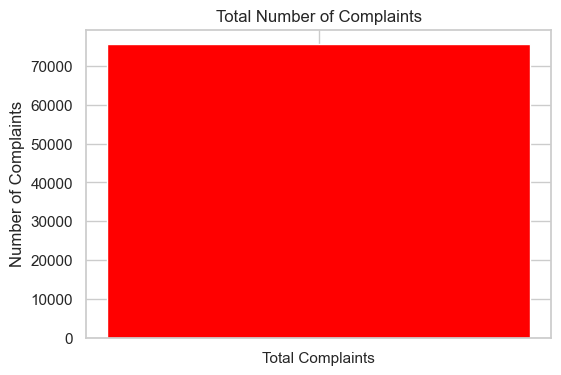

In [44]:
# Count the total number of unique complaints using the Complaint ID
total_complaints = df['Complaint ID'].nunique()
print("Total Complaints:", total_complaints)

# Plot the total number of complaints
plt.figure(figsize=(6, 4))
plt.bar(['Total Complaints'], [total_complaints], color='red')
plt.ylabel('Number of Complaints')
plt.title('Total Number of Complaints')
plt.show()

2. Timely Response Rate

Timely Response Rate: 98.1 %


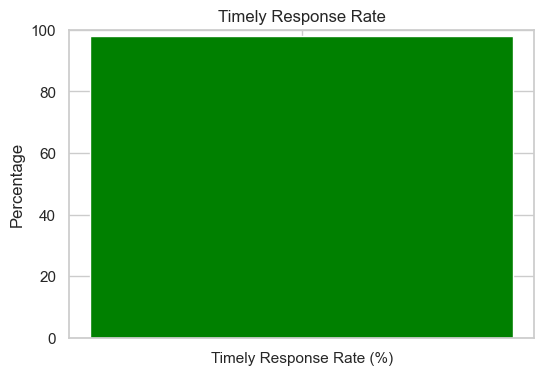

In [46]:
# Calculate the Timely Response Rate
timely_response_rate = round((df['Timely response?'].str.lower() == 'yes').mean() * 100, 1)
print("Timely Response Rate:", timely_response_rate, "%")

# Plot the Timely Response Rate
plt.figure(figsize=(6, 4))
bar = plt.bar(['Timely Response Rate (%)'], [timely_response_rate], color='green')

plt.ylabel('Percentage')
plt.title('Timely Response Rate')
plt.ylim(0, 100)  # Set the y-axis limit to 100% for better visualization
plt.show()


3. Check for Pending Company Response to Consumer

Pending Company Responses: 283


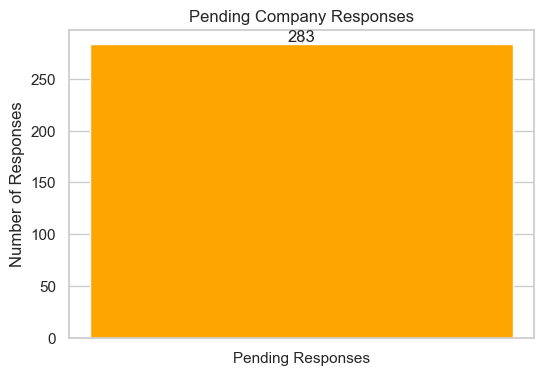

In [50]:
# Check for Pending Company Response to Consumer
pending_responses = df[df['Company response to consumer'].str.lower() == 'in progress'].shape[0]
print("Pending Company Responses:", pending_responses)

# Plot the Pending Company Responses
plt.figure(figsize=(6, 4))
bar = plt.bar(['Pending Responses'], [pending_responses], color='orange')

# Add the count as a label on the bar
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.ylabel('Number of Responses')
plt.title('Pending Company Responses')
plt.show()

4. Consumer Dispute Rate

Consumer Dispute Rate: 9.8 %


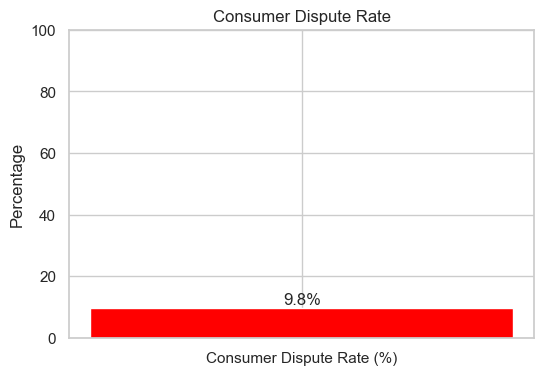

In [51]:
# Calculate the Consumer Dispute Rate
dispute_rate = round((df['Consumer disputed?'].str.lower() == 'yes').mean() * 100, 1)
print("Consumer Dispute Rate:", dispute_rate, "%")

# Plot the Consumer Dispute Rate
plt.figure(figsize=(6, 4))
bar = plt.bar(['Consumer Dispute Rate (%)'], [dispute_rate], color='red')

# Add the dispute rate as a label on the bar
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height}%', ha='center', va='bottom')

plt.ylabel('Percentage')
plt.title('Consumer Dispute Rate')
plt.ylim(0, 100)  # Set the y-axis limit to 100% for better visualization
plt.show()

5. Dispute Resolved at No Cost

Resolved at No Cost Rate: 84.1 %


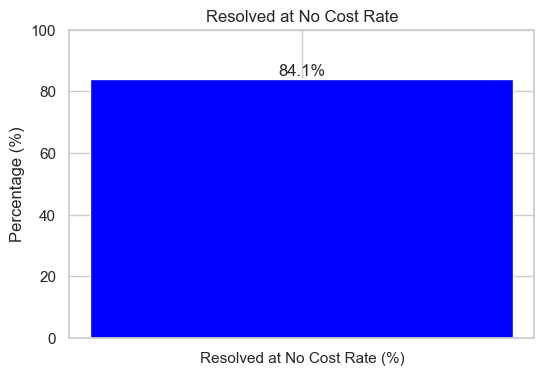

In [57]:
# Filter the DataFrame
not_in_progress_or_monetary_relief = df[~df['Company response to consumer'].isin(['in progress', 'closed with monetary relief'])]
resolved_at_no_cost = round((len(not_in_progress_or_monetary_relief) / len(df) * 100), 1)

# Print the calculated rate
print("Resolved at No Cost Rate:", resolved_at_no_cost, "%")

# Plotting the Resolved at No Cost Rate
plt.figure(figsize=(6, 4))
bar = plt.bar(['Resolved at No Cost Rate (%)'], [resolved_at_no_cost], color='blue')

# Add the resolved at no cost rate as a label on the bar
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height}%', ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.title('Resolved at No Cost Rate')
plt.ylim(0, 100)  # Set the y-axis limit to 100% for better visualization context
plt.show()

6. Complaints By Issues

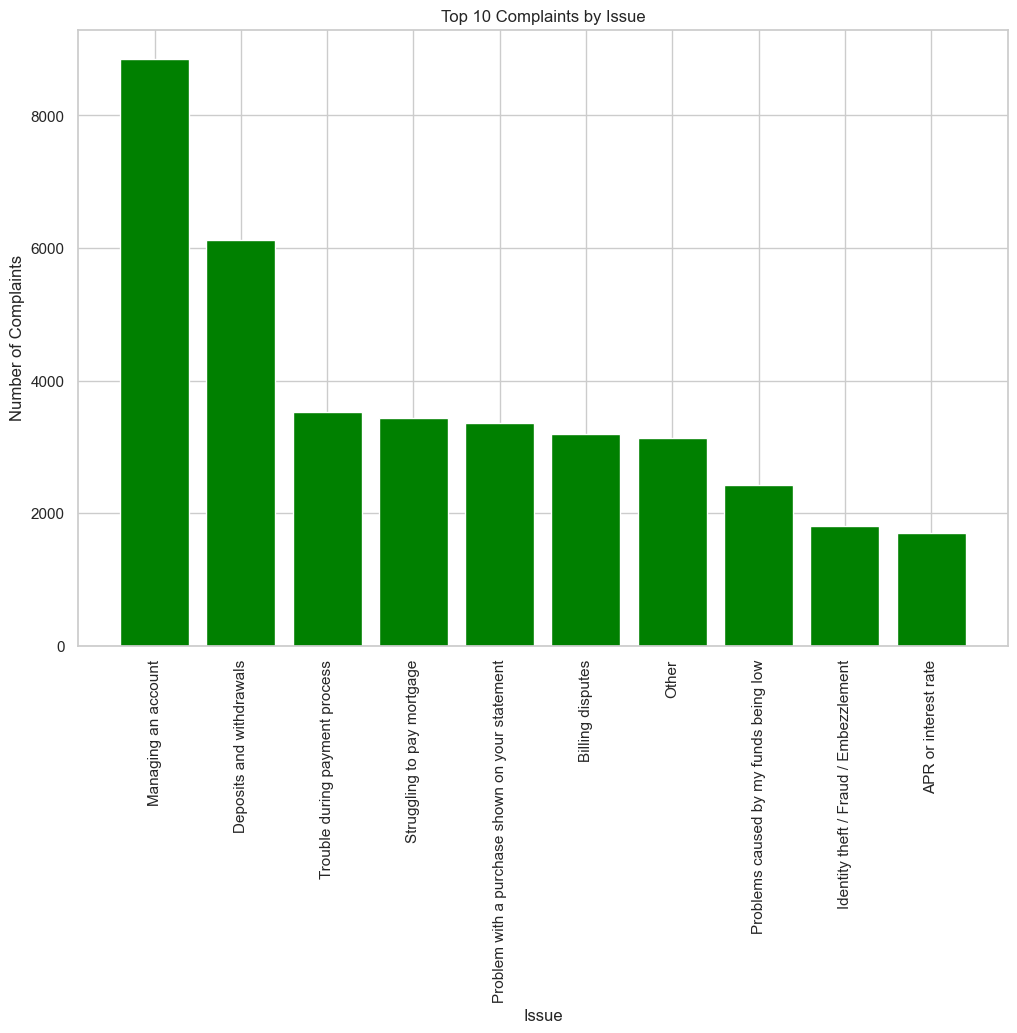

In [60]:
# Group by the 'Issue' column, count the occurrences, and sort them in descending order
complaints_by_issues = df.groupby('Issue').size().reset_index(name='Complaint_by_Issues')
complaints_by_issues = complaints_by_issues.sort_values('Complaint_by_Issues', ascending=False)

# Select the top 10 issues
top_10_issues = complaints_by_issues.head(10)

# Plot the data for the top 10 issues
plt.figure(figsize=(12, 8))
plt.bar(top_10_issues['Issue'], top_10_issues['Complaint_by_Issues'], color='green')
plt.xlabel('Issue')
plt.ylabel('Number of Complaints')
plt.title('Top 10 Complaints by Issue')
plt.xticks(rotation=90)
plt.show()

 7. Complaints By State

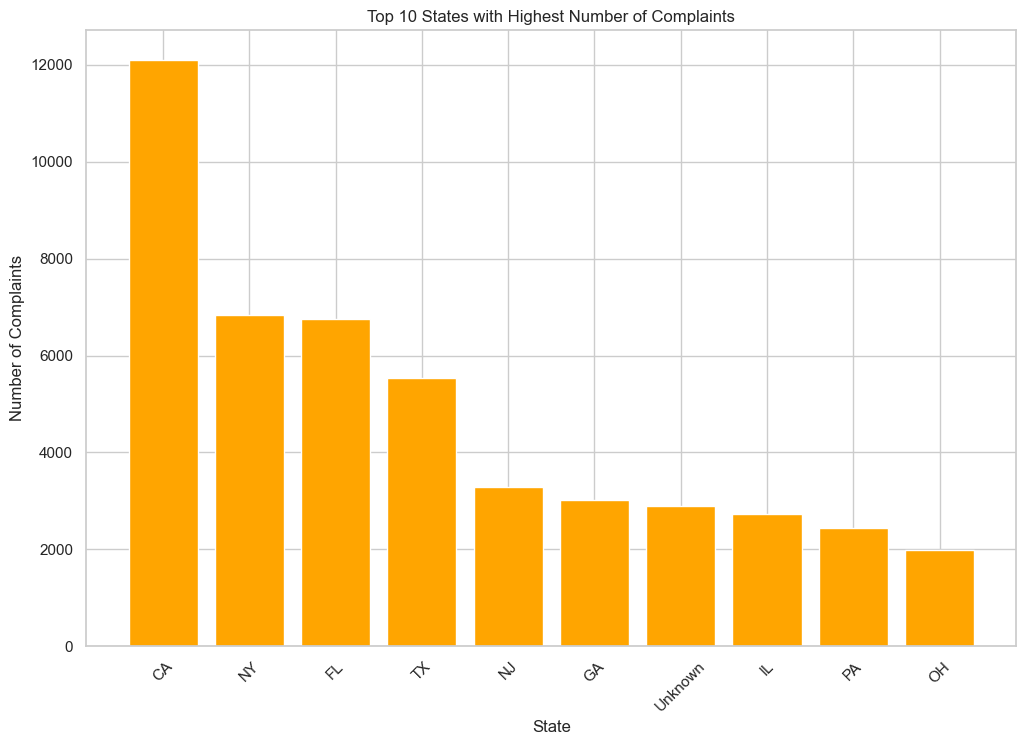

In [62]:
# Group by the 'State' column, count the occurrences, and sort them in descending order
complaints_by_state = df.groupby('State').size().reset_index(name='Complaints_By_States')
complaints_by_state = complaints_by_state.sort_values('Complaints_By_States', ascending=False)

# Select the top 10 states
top_10_states = complaints_by_state.head(10)

# Plot the data for the top 10 states
plt.figure(figsize=(12, 8))
plt.bar(top_10_states['State'], top_10_states['Complaints_By_States'], color='orange')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.title('Top 10 States with Highest Number of Complaints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

 8. Complaints By Products

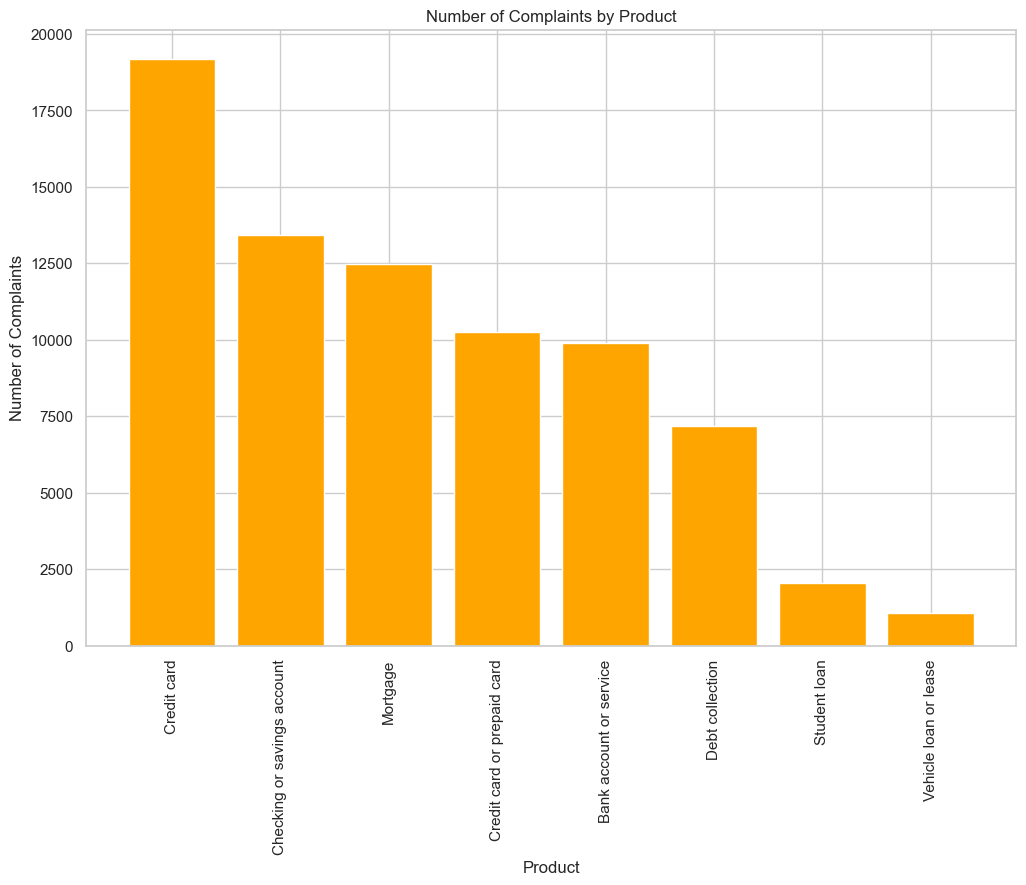

In [64]:
# Group by the 'Product' column, count the occurrences, and sort them in descending order
complaints_by_product = df.groupby('Product').size().reset_index(name='Complaints_By_Product')
complaints_by_product = complaints_by_product.sort_values('Complaints_By_Product', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(complaints_by_product['Product'], complaints_by_product['Complaints_By_Product'], color='orange')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints by Product')
plt.xticks(rotation=90)
plt.show()

10. Complaints By Media

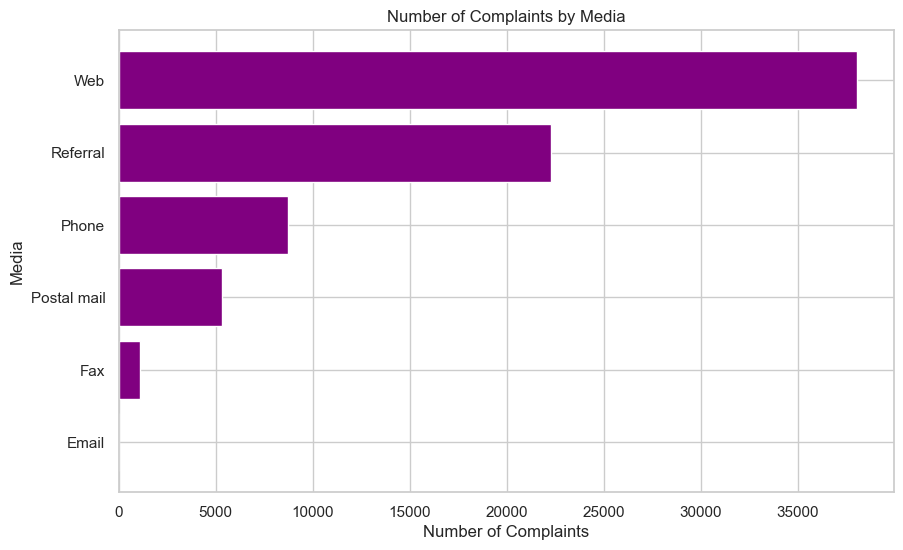

In [65]:
# Group by the 'Submitted via' column, count the occurrences, and sort them in descending order
complaints_by_media = df.groupby('Submitted via').size().reset_index(name='Complaints_By_Media')
complaints_by_media = complaints_by_media.sort_values('Complaints_By_Media', ascending=True)  # Sort for horizontal chart

# Plot the data as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(complaints_by_media['Submitted via'], complaints_by_media['Complaints_By_Media'], color='purple')
plt.xlabel('Number of Complaints')
plt.ylabel('Media')
plt.title('Number of Complaints by Media')
plt.show()

10. % Consumer Disputer

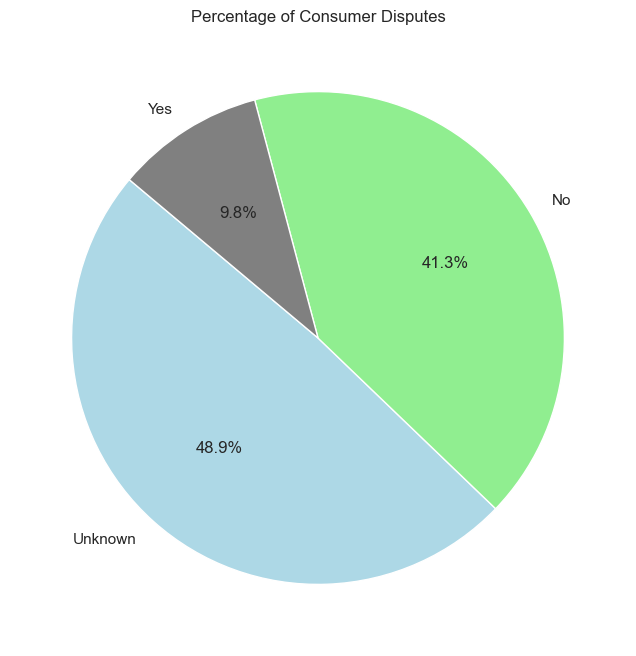

In [68]:
# Calculate the count of disputes and the percentage of each dispute status
dispute_counts = df['Consumer disputed?'].value_counts()
total_disputes = dispute_counts.sum()
dispute_percentage = (dispute_counts / total_disputes) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(dispute_percentage, labels=dispute_percentage.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'grey'])
plt.title('Percentage of Consumer Disputes')
plt.show()